In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
data.head()

,id,protected,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,1,54622,Accounts,Cytomol Labs,Secunderabad,6.0,8000,31 Jan' 22,33 applicants,"Accounting , Tally ,",NaN,1,0,Commerce
1,2,27305950,Graphic Design,Varistor Solar,Ajmer,6.0,6000,5 Feb' 22,Be an early applicant,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,3,22681506,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000,10 Feb' 22,48 applicants,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,4,57706912,Marketing,Glamanand Entertainment,Work From Home,4.0,5000,7 Feb' 22,53 applicants,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,5,43990,Accounts,SocialWell,Bhubaneswar,6.0,6000,3 Feb' 22,Be an early applicant,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce


In [5]:
del data["id"]
del data["protected"]
data

,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,Accounts,Cytomol Labs,Secunderabad,6.0,8000,31 Jan' 22,33 applicants,"Accounting , Tally ,",NaN,1,0,Commerce
1,Graphic Design,Varistor Solar,Ajmer,6.0,6000,5 Feb' 22,Be an early applicant,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000,10 Feb' 22,48 applicants,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,Marketing,Glamanand Entertainment,Work From Home,4.0,5000,7 Feb' 22,53 applicants,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,Accounts,SocialWell,Bhubaneswar,6.0,6000,3 Feb' 22,Be an early applicant,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...
8513,The Young Conservationist Program,WWF-India,Work From Home,1.5,0,8 Feb' 22,60 applicants,"Client Relationship , English Proficiency (Spo...","Certificate , Letter of recommendation , Flexi...",20,0,Volunteering
8514,Graphic Design,Emblix Solutions,Hyderabad,6.0,8000,5 Feb' 22,Be an early applicant,"Adobe Illustrator , Adobe Photoshop , Adobe Ph...","Certificate , Letter of recommendation , Job o...",10,0,Graphic Design
8515,Illustration Design,Next Generation Skills Analytics And Testing P...,Work From Home,3.0,5000,3 Feb' 22,45 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
8516,Unity 3D,CelebratingLife Infotech,Work From Home,3.0,4000,9 Feb' 22,Be an early applicant,"Unity 3D , Unreal Engine ,","Certificate , Flexible work hours ,",2,0,Computer Science


In [6]:
print(data["Category"].value_counts())

Marketing           3172
Computer Science    1845
Content Writing     1192
Graphic Design       882
Human Resources      684
Volunteering         177
Commerce             118
Science               86
Mechanical            74
Law                   67
Finance               65
Architecture          64
Electronics           64
Humanities            28
Name: Category, dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               8518 non-null   object 
 1   Company             8518 non-null   object 
 2   Location            8518 non-null   object 
 3   Duration            8518 non-null   float64
 4   Stipend_per_month   8518 non-null   object 
 5   Apply By            8518 non-null   object 
 6   Applicants          8518 non-null   object 
 7   Skills Required     6412 non-null   object 
 8   Perks               8104 non-null   object 
 9   Number of Openings  8518 non-null   int64  
 10  Incentives          8518 non-null   int64  
 11  Category            8518 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 798.7+ KB


In [8]:
data.Category.nunique()

14

In [9]:
data["Stipend_per_month"] = pd.to_numeric(pd.Series(data["Stipend_per_month"]),errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               8518 non-null   object 
 1   Company             8518 non-null   object 
 2   Location            8518 non-null   object 
 3   Duration            8518 non-null   float64
 4   Stipend_per_month   8460 non-null   float64
 5   Apply By            8518 non-null   object 
 6   Applicants          8518 non-null   object 
 7   Skills Required     6412 non-null   object 
 8   Perks               8104 non-null   object 
 9   Number of Openings  8518 non-null   int64  
 10  Incentives          8518 non-null   int64  
 11  Category            8518 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 798.7+ KB


In [11]:
data.shape


(8518, 12)

In [12]:
data.isnull().sum()

Title                    0
Company                  0
Location                 0
Duration                 0
Stipend_per_month       58
Apply By                 0
Applicants               0
Skills Required       2106
Perks                  414
Number of Openings       0
Incentives               0
Category                 0
dtype: int64

In [13]:
data["Stipend_per_month"].fillna(value=data["Stipend_per_month"].mean(),inplace = True)

In [14]:
data["Skills Required"].fillna(value = "No Skills required", inplace=True)
data["Perks"].fillna(value = "No Perks provided", inplace=True)

In [15]:
data.isnull().sum()

Title                 0
Company               0
Location              0
Duration              0
Stipend_per_month     0
Apply By              0
Applicants            0
Skills Required       0
Perks                 0
Number of Openings    0
Incentives            0
Category              0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data["Category"]=enc.fit_transform(data["Category"])

In [17]:
data['Type of workplace']= data['Location'].apply(lambda a: 'In-Office' if a!='Work From Home' else a)

In [18]:
a = [None]*data.shape[0]
for i in range(data.shape[0]):
   a[i] = len(data['Skills Required'].iloc[i].split(','))-1
data['No of skills required'] = a

In [19]:
a = [0]*data.shape[0]
for i in range(data.shape[0]):
    a[i]=len(data['Perks'].iloc[i].split(','))-1
data['No. of Perks']= a 

In [20]:
del data["Skills Required"]
del data["Perks"]
data.head()

,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Number of Openings,Incentives,Category,Type of workplace,No of skills required,No. of Perks
0,Accounts,Cytomol Labs,Secunderabad,6.0,8000.0,31 Jan' 22,33 applicants,1,0,1,In-Office,2,0
1,Graphic Design,Varistor Solar,Ajmer,6.0,6000.0,5 Feb' 22,Be an early applicant,2,0,6,In-Office,1,6
2,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000.0,10 Feb' 22,48 applicants,1,0,6,Work From Home,6,2
3,Marketing,Glamanand Entertainment,Work From Home,4.0,5000.0,7 Feb' 22,53 applicants,6,0,10,Work From Home,2,5
4,Accounts,SocialWell,Bhubaneswar,6.0,6000.0,3 Feb' 22,Be an early applicant,1,0,1,In-Office,1,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  8518 non-null   object 
 1   Company                8518 non-null   object 
 2   Location               8518 non-null   object 
 3   Duration               8518 non-null   float64
 4   Stipend_per_month      8518 non-null   float64
 5   Apply By               8518 non-null   object 
 6   Applicants             8518 non-null   object 
 7   Number of Openings     8518 non-null   int64  
 8   Incentives             8518 non-null   int64  
 9   Category               8518 non-null   int64  
 10  Type of workplace      8518 non-null   object 
 11  No of skills required  8518 non-null   int64  
 12  No. of Perks           8518 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 865.2+ KB


In [21]:
data.describe(include='all')

,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Number of Openings,Incentives,Category,Type of workplace,No of skills required,No. of Perks
count,8518,8518,8518,8518.000000,8518.000000,8518,8518,8518.000000,8518.000000,8518.000000,8518,8518.000000,8518.000000
unique,1247,5553,166,NaN,NaN,37,378,NaN,NaN,NaN,2,NaN,NaN
top,Content Writing,Relinns Technologies,Work From Home,NaN,NaN,11 Feb' 22,Be an early applicant,NaN,NaN,NaN,Work From Home,NaN,NaN
freq,922,52,4828,NaN,NaN,931,4597,NaN,NaN,NaN,4828,NaN,NaN
mean,NaN,NaN,NaN,3.611793,6124.351458,NaN,NaN,6.551773,0.094975,6.426274,NaN,2.915004,2.949401
std,NaN,NaN,NaN,1.947216,4846.944389,NaN,NaN,83.123584,0.293198,3.594531,NaN,2.702641,1.393943
min,NaN,NaN,NaN,0.250000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,2.000000,3000.000000,NaN,NaN,1.000000,0.000000,3.000000,NaN,1.000000,2.000000
50%,NaN,NaN,NaN,3.000000,5000.000000,NaN,NaN,2.000000,0.000000,7.000000,NaN,2.000000,3.000000
75%,NaN,NaN,NaN,6.000000,8000.000000,NaN,NaN,5.000000,0.000000,10.000000,NaN,4.000000,4.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

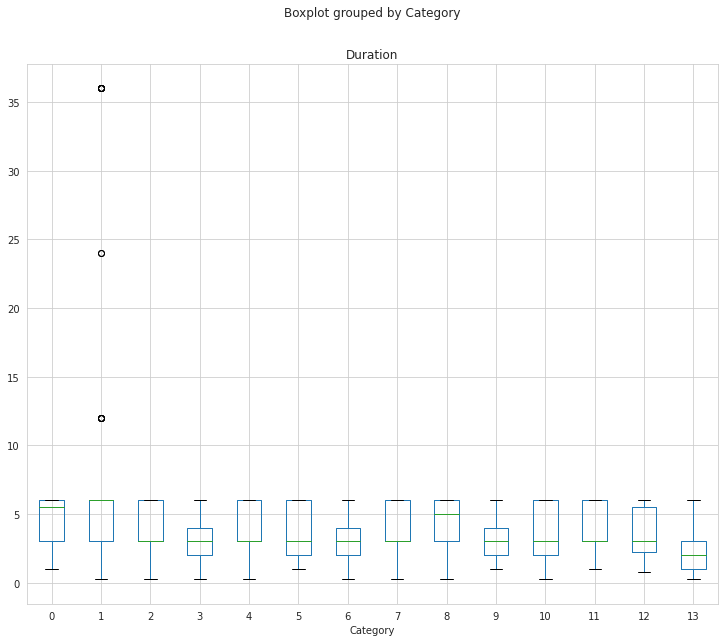

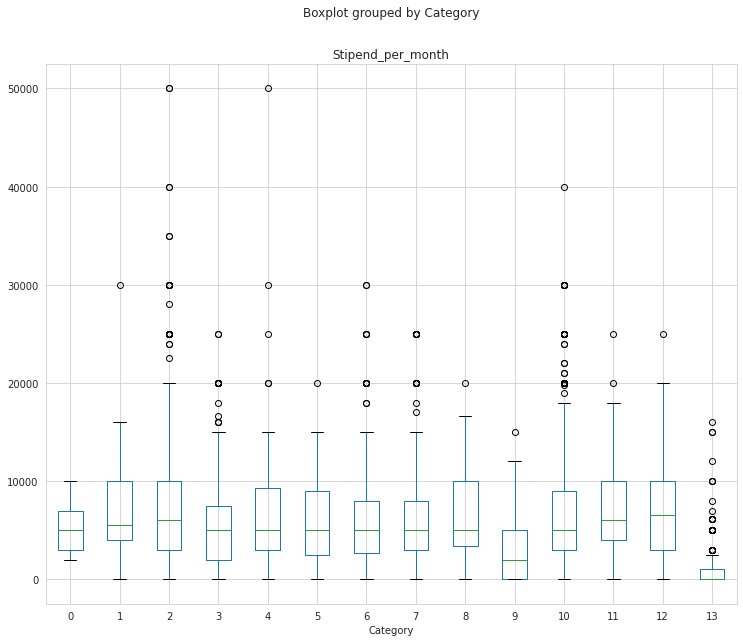

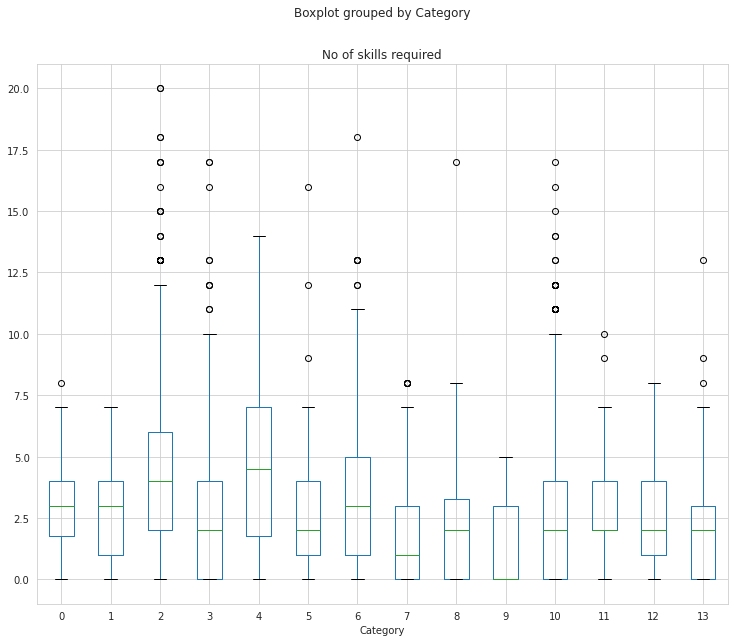

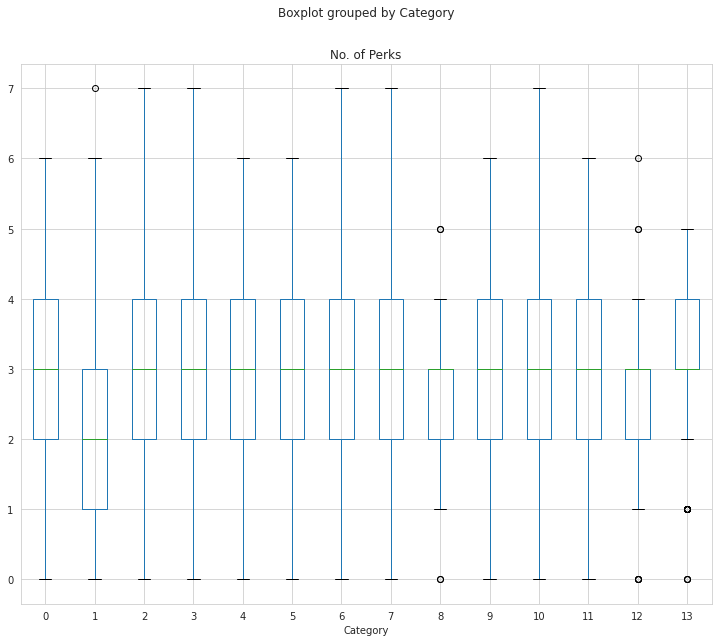

In [22]:
data_features = ['Duration','Stipend_per_month','No of skills required','No. of Perks']
data_label = 'Category'
for col in data_features:
  data.boxplot(column=col , by = data_label,figsize=(12,10))

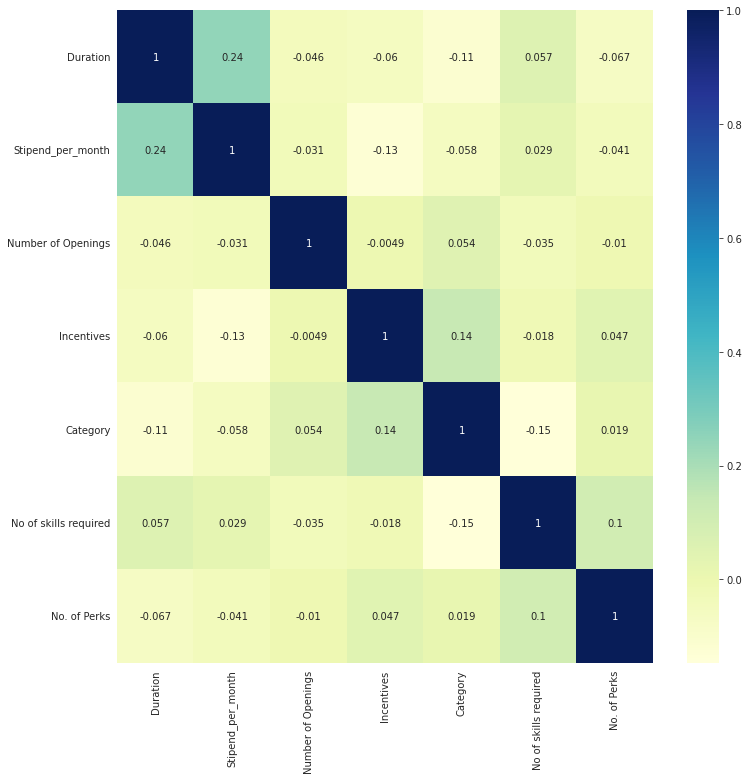

In [25]:
fig , ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)